In [1]:
import torch, torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.models as models
import matplotlib.pyplot as plt
import time, os, copy, numpy as np
from livelossplot import PlotLosses
from train_model import train_model
%matplotlib inline

Using TensorFlow backend.


In [8]:
data_transforms = { 'train': transforms.Compose([transforms.ToTensor()]),
                    'val'  : transforms.Compose([transforms.ToTensor(),]) }

data_dir = 'images/64'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=100, shuffle=True, num_workers=64)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [11]:
#Load Resnet18 with pretrained weights
model_ft = models.resnet18()
#Finetune Final few layers to adjust for tiny imagenet input
model_ft.avgpool = nn.AdaptiveAvgPool2d(1)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 200)
# model_ft.conv1 = nn.Conv2d(3,64, kernel_size=(3,3), stride=(1,1), padding=(1,1))
# model_ft.maxpool = nn.Sequential()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device)
#Multi GPU
model_ft = torch.nn.DataParallel(model_ft, device_ids=[0, 1])
model_ft.load_state_dict(torch.load('./models/resnet18_224_w.pt'))

# pretrained_dict = torch.load('./models/resnet18_224_w.pt')
# model_ft_dict = model_ft.state_dict()
# first_layer_weight = model_ft_dict['module.conv1.weight']
# first_layer_bias  = model_ft_dict['module.conv1.bias']
# pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_ft_dict}

# model_ft_dict.update(pretrained_dict) 
# model_ft_dict['module.conv1.weight'] = first_layer_weight
# model_ft_dict['module.conv1.bias']   = first_layer_bias
# model_ft.load_state_dict(model_ft_dict)


#Loss Function
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

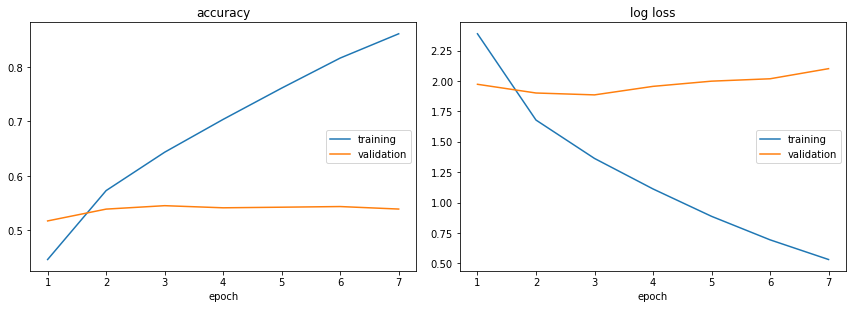

Train Loss: 0.5321 Acc: 0.8608
Val Loss: 2.1013 Acc: 0.5390
Best Val Accuracy: 0.5452

Training complete in 7m 19s
Best val Acc: 0.545200


In [12]:
#Train
model_ft = train_model(model_ft, dataloaders, dataset_sizes, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=7)

In [6]:
#Load Resnet18 with pretrained weights
model_ft = models.resnet18()
#Finetune Final few layers to adjust for tiny imagenet input
model_ft.avgpool = nn.AdaptiveAvgPool2d(1)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 200)
model_ft.conv1 = nn.Conv2d(3,64, kernel_size=(3,3), stride=(1,1), padding=(1,1))
model_ft.maxpool = nn.Sequential()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device)
#Multi GPU
model_ft = torch.nn.DataParallel(model_ft, device_ids=[0, 1])
pretrained_dict = torch.load('./models/resnet18_224_w.pt')
model_ft_dict = model_ft.state_dict()
first_layer_weight = model_ft_dict['module.conv1.weight']
first_layer_bias  = model_ft_dict['module.conv1.bias']
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_ft_dict}

model_ft_dict.update(pretrained_dict) 
model_ft_dict['module.conv1.weight'] = first_layer_weight
model_ft_dict['module.conv1.bias']   = first_layer_bias
model_ft.load_state_dict(model_ft_dict)


#Loss Function
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

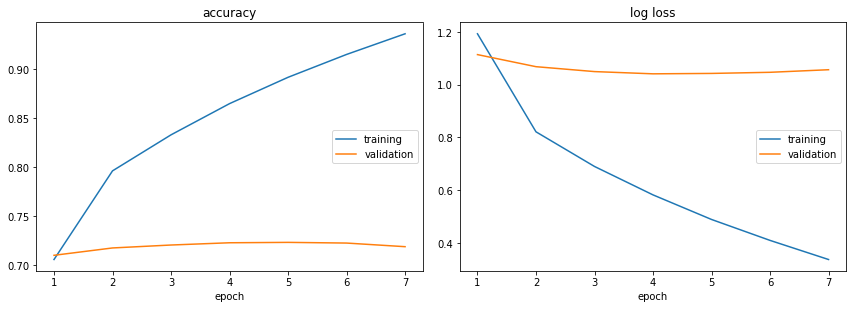

Train Loss: 0.3367 Acc: 0.9360
Val Loss: 1.0571 Acc: 0.7186
Best Val Accuracy: 0.7230000000000001

Training complete in 13m 17s
Best val Acc: 0.723000


In [7]:
#Train
model_ft = train_model(model_ft, dataloaders, dataset_sizes, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=7)

In [5]:
# torch.save(model_ft.state_dict(), "./models/resnet18_256_64.pt") 

In [6]:
# torch.save(model_ft, "./models/resnet18_64_full_model.pt")